# Basic Portfolio

This portfolio was created based in a passive allocation, with no rebalancing and no new aports.

### Importing the libraries

In [3]:
import yfinance as yf
import pandas as pd

### Defining the Assets and Weights

In [4]:
# Dictionary with the asset classes and the chosen etfs to represent them in our portfolio
securities = {
    'US_Stocks' : ['IVV', 0.5],
    'Bonds' : ['AGG', 0.3],
    'TIPs' : ['TIP', 0.2],
}

### Defining the main function

It will be responsible to collect the data, and compute the aggregated result for the porfolio.

In [5]:
def getPortfData(portfolio):
    '''
    The function gets a dictionary as input and calculates the historical return of the porfolio chosen
    '''
    basket_returns = []
    
    for asset in portfolio.items():
        security = yf.Ticker(asset[1][0]).history(period="max")
        returns = security['Close'].pct_change().dropna()
        weight = asset[1][1]
        basket_returns.append(returns)

    hist_returns = pd.concat(basket_returns, 1)
    hist_returns = hist_returns.dropna()
    hist_returns = (hist_returns+1).cumprod()
    hist_returns.columns = portfolio.keys()
    hist_returns["Portfolio"] = hist_returns.shape[0]*[0]
    
    for i in range(len(hist_returns.columns)-1):
        asset_return = hist_returns[hist_returns.columns[i]]
        weight = list(portfolio.items())[i][1][1]
        hist_returns.Portfolio = asset_return*weight + hist_returns.Portfolio
        
    return hist_returns - 1 

### Calling the function and plotting the results

<ipython-input-43-da7ce780300d>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  yaxis = plot.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


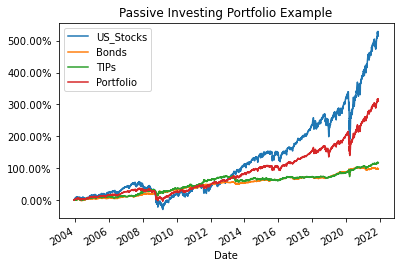

In [43]:
plot = dados.plot(title = 'Passive Investing Portfolio Example')
# manipulate
vals = plot.get_yticks()
yaxis = plot.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
fig = plot.get_figure()
fig.savefig('Plot.png')